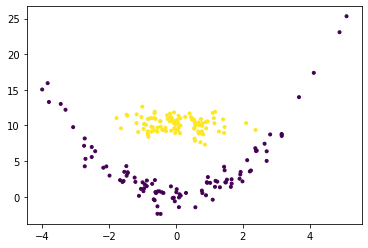

[-3.38987741] [[-0.05674024  0.45998177]]


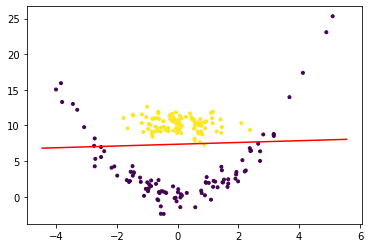

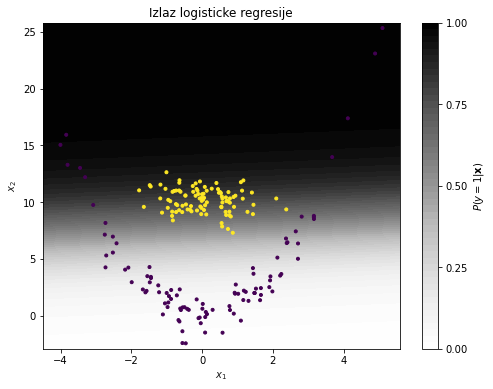

[1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 0.]


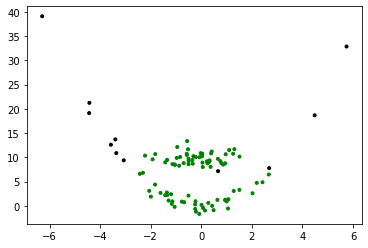

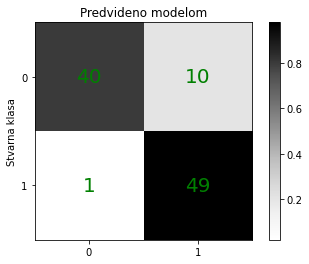

Accuracy (Tocnost) =  0.89
Missclarification rate =  0.10999999999999999
Precision (Preciznost) =  0.8305084745762712
Recall (Odziv) =  0.98
49 10 1 40
Specificity (specifičnost) =  0.8305084745762712
[-2.61969314] [[ 0.12267228 -0.05518046 -1.0481032   0.22577845  0.17285068 -0.07862998
  -0.16632526 -0.005889    0.0015386 ]]


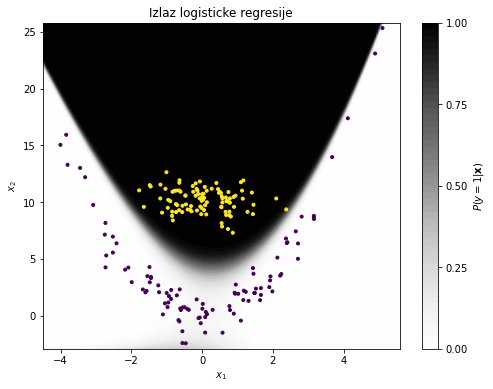

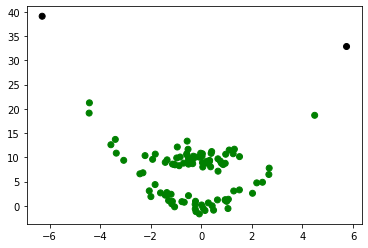

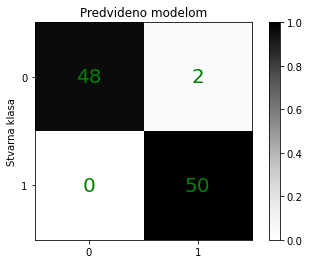

Accuracy (Tocnost) =  0.98
Missclarification rate =  0.020000000000000018
Precision (Preciznost) =  0.9615384615384616
Recall (Odziv) =  1.0
50 2 0 48
Specificity (specifičnost) =  0.9615384615384616
KNeighborsClassifier(n_neighbors=3)


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()

#zadatak 1
np.random.seed(242)
learning_Set = generate_data(200)
np.random.seed(12)
test_Set = generate_data(100)

#zadatak 2
#print(learning_Set)
plt.figure()
plt.scatter(learning_Set[:,0], learning_Set[:,1], marker = '.', c = learning_Set[:,2]) 
#print(learning_Set[:,0])
plt.show()


#zadatak 3
#logisticka regresija https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
logisticRegr = LogisticRegression()

logisticReg_output = logisticRegr.fit(learning_Set[:,:2],learning_Set[:,2] ) #odredjivanje parametara modela theta
theta0 = logisticReg_output.intercept_
theta1 = logisticReg_output.coef_
print(theta0, theta1)

plt.figure()
plt.scatter(learning_Set[:,0], learning_Set[:,1], marker = '.', c = learning_Set[:,2])
ax = plt.gca()
x1 = np.array(ax.get_xlim())
x2 = -(theta0 + theta1[0][0]*x1)/theta1[0][1]
plt.plot(x1,x2, c = "r")


#https://scikit-learn.org/stable/getting_started.html ->validation
#zadatak 4
f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(learning_Set[:,0])-0.5:max(learning_Set[:,0])+0.5:.05,
                          min(learning_Set[:,1])-0.5:max(learning_Set[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = logisticReg_output.predict_proba(grid)[:, 1].reshape(x_grid.shape)

cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)
plt.scatter(learning_Set[:,0], learning_Set[:,1], marker = '.', c = learning_Set[:,2])
ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()


#zadatak5
LogRegPredict = logisticRegr.predict(test_Set[:,:2]) #radi predvidjanje modela
print(LogRegPredict)
test_sample = test_Set[:,2]
test_colormap = ['g' if LogRegPredict[i] == test_sample[i] else 'k' 
                 for i in range(len(LogRegPredict))]
plt.scatter(test_Set[:,0], test_Set[:,1], marker = '.', c = test_colormap)


#zadatak6
confusionMatrix = confusion_matrix(test_sample, LogRegPredict) #testni uzorci, testna predvidjanja
plot_confusion_matrix(confusionMatrix)
yTrue = test_Set[:,2]
yPredicted = LogRegPredict
accuracy = accuracy_score(yTrue, yPredicted)
print("Accuracy (Tocnost) = ", accuracy) # (tp + tn) / (tp + tn + fp + fn)
print("Missclarification rate = ", 1 - accuracy)
precision = precision_score(yTrue,yPredicted) 
print("Precision (Preciznost) = ", precision) # tp / (tp + fp)
recall = recall_score(yTrue,yPredicted)
print("Recall (Odziv) = ", recall ) # tn / (tn + fp)
tp, fp, fn, tn = confusionMatrix.ravel()
print(tn, fp, fn, tp)
specificity = tn / (tn + fp)
print("Specificity (specifičnost) = ", specificity)


#zadtak7
poly = PolynomialFeatures(degree=3, include_bias = False) #prosirenjne skupa do degree = 3 stupnja
data_train_new = poly.fit_transform(learning_Set[:,0:2])
data_test_new = poly.fit_transform(test_Set[:,0:2])
    #ponovljeni 3. zadatak
logisticRegr = LogisticRegression(solver = 'liblinear') #dodano ovo soler = liblinear jer se zbuni
logisticReg_output = logisticRegr.fit(data_train_new ,learning_Set[:,2]) #odredjivanje parametara modela theta
theta0 = logisticReg_output.intercept_
theta1 = logisticReg_output.coef_
print(theta0, theta1)

f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(data_train_new[:,0])-0.5:max(data_train_new[:,0])+0.5:.05,
                          min(data_train_new[:,1])-0.5:max(data_train_new[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
grid =  poly.fit_transform(grid)
probs = logisticReg_output.predict_proba(grid)[:, 1].reshape(x_grid.shape)

cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)
plt.scatter(learning_Set[:,0], learning_Set[:,1], marker = '.', c = learning_Set[:,2])
ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()
    #ponovljeni zadatak5
LogRegPredict = logisticRegr.predict(data_test_new) #radi predvidjanje modela
test_sample = test_Set[:,2]
#print(LogRegPredict)
#print(test_sample)
test_colormap = ['g' if LogRegPredict[i] == test_sample[i] else 'k' 
                 for i in range(len(LogRegPredict))]
plt.scatter(data_test_new[:,0], data_test_new[:,1], c = test_colormap)
    #ponovljeni zadtak6
confusionMatrix = confusion_matrix(test_sample, LogRegPredict) #testni uzorci, testna predvidjanja
plot_confusion_matrix(confusionMatrix)
yTrue = test_Set[:,2]
yPredicted = LogRegPredict
accuracy = accuracy_score(yTrue, yPredicted)
print("Accuracy (Tocnost) = ", accuracy) # (tp + tn) / (tp + tn + fp + fn)
print("Missclarification rate = ", 1 - accuracy)
precision = precision_score(yTrue,yPredicted) 
print("Precision (Preciznost) = ", precision) # tp / (tp + fp)
#tocnost: udio točno klasificirani primjera u cijelom skupu
#uce4stalost pogreske: definira se kao udio pogrešno klasificiranih primjera u cijelom skupu.
#preciznost:  udio točno klasificiranih primjera u skupu koje model klasificira kao klasa +
#odziv: udio točno klasificiranih primjera u skupu primjera koji pripadaju klasi +.
#spec: udio točno klasificiranih primjera u skupu svih primjera koji pripadaju klasi
recall = recall_score(yTrue,yPredicted)
print("Recall (Odziv) = ", recall ) # tn / (tn + fp)
tp, fp, fn, tn = confusionMatrix.ravel()
print(tn, fp, fn, tp)
specificity = tn / (tn + fp)
print("Specificity (specifičnost) = ", specificity)


#zadatak8
neighbors = KNeighborsClassifier(n_neighbors = 3)
print(neighbors)

